In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
!mkdir -p ~/.kaggle
!mv /Users/turfdiddy/Downloads/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: /Users/turfdiddy/Downloads/kaggle.json: No such file or directory


In [3]:
!kaggle datasets download -d asaniczka/uk-optimal-product-price-prediction

Dataset URL: https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction
License(s): ODC Attribution License (ODC-By)
uk-optimal-product-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip uk-optimal-product-price-prediction.zip

Archive:  uk-optimal-product-price-prediction.zip
replace amz_uk_price_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

OSError: [Errno 5] Input/output error

In [6]:
import pandas as pd

df = pd.read_csv("optimal_price_data.csv")  # Replace with actual filename if different
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'optimal_price_data.csv'

In [ ]:
import os
os.getcwd()

In [7]:
import pandas as pd

df = pd.read_csv("/Users/turfdiddy/Desktop/amz_uk_price_prediction_dataset.csv")

# Preview the first few rows
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


Top 5 Most Listed Product Categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


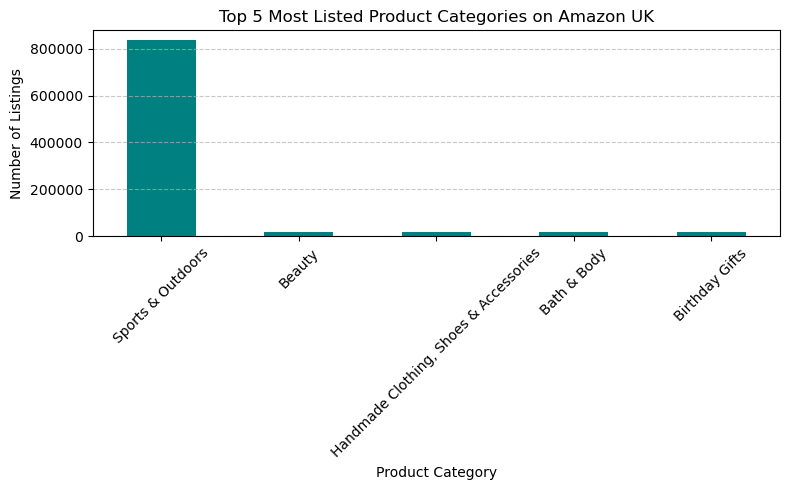

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already your DataFrame

# Step 1: Get frequency of each category
category_freq = df['category'].value_counts()

# Step 2: Select the top 5 categories
top5_categories = category_freq.head(5)

# Step 3: Print the result
print("Top 5 Most Listed Product Categories:")
print(top5_categories)

# Step 4: Plot the frequency as a bar chart
plt.figure(figsize=(8, 5))
top5_categories.plot(kind='bar', color='teal')
plt.title('Top 5 Most Listed Product Categories on Amazon UK')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
category_freq

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [11]:
category_freq.head(10)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

In [12]:
category_freq = df['category'].value_counts().head(5).reset_index()
category_freq.columns = ['category', 'num_listings']

In [13]:
category_freq

,category,num_listings
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


In [14]:
import seaborn as sns

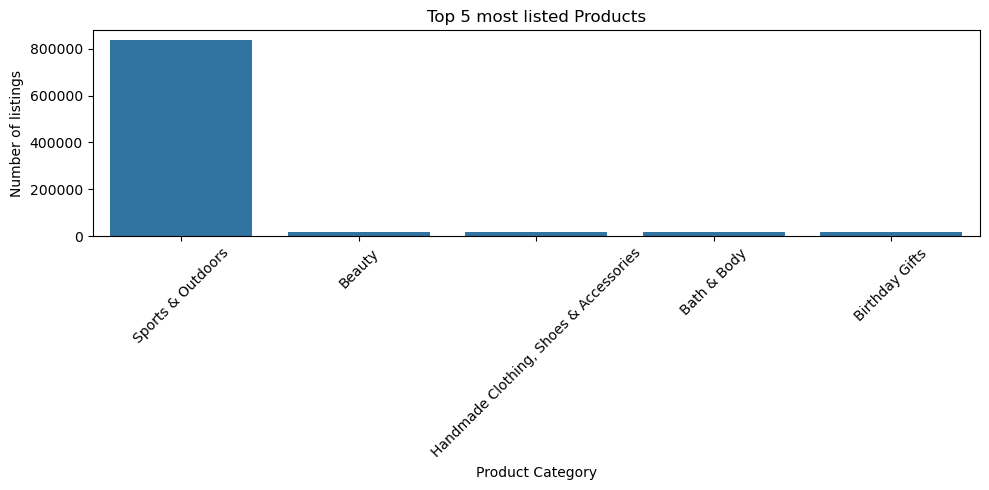

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(data=category_freq, x="category", y="num_listings")
plt.title("Top 5 most listed Products")
plt.ylabel("Number of listings")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

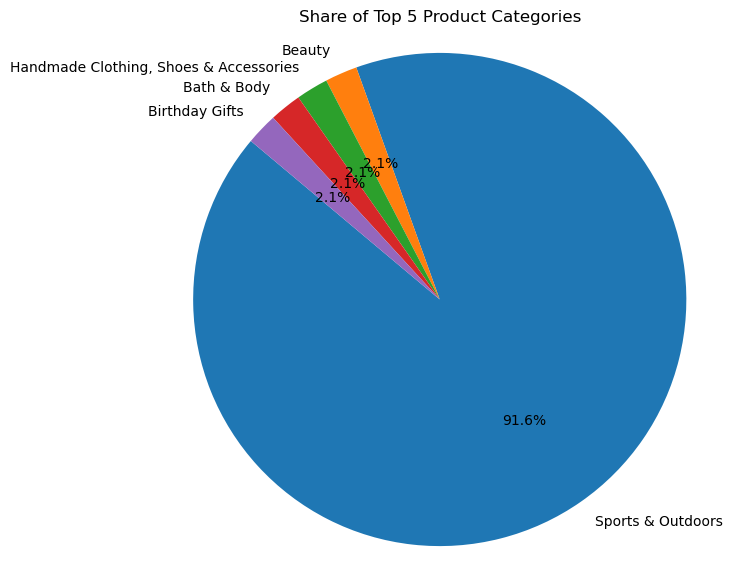

In [16]:
# Pie chart of top 5 categories
plt.figure(figsize=(7, 7))
plt.pie(category_freq['num_listings'], labels=category_freq['category'], autopct='%1.1f%%', startangle=140)
plt.title('Share of Top 5 Product Categories')
plt.axis('equal')
plt.show()

In [17]:
top_categories = df['category'].value_counts().head(10).reset_index()
top_categories.columns = ['category', 'num_listings']

In [18]:
top_categories

,category,num_listings
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
5,Manicure & Pedicure Products,18940
6,Skin Care,18769
7,Make-up,18756
8,Hair Care,18735
9,Fragrances,18564


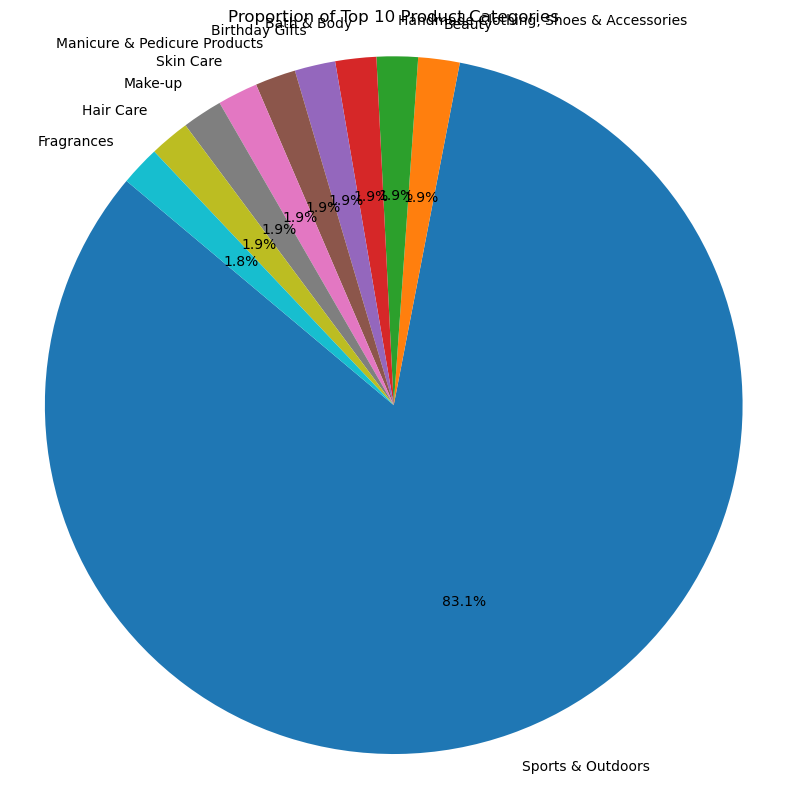

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(top_categories['num_listings'], labels=top_categories['category'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Top 10 Product Categories')
plt.axis('equal')  # Ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [20]:
# View how many products exist per category
category_summary = df['category'].value_counts().reset_index()
category_summary.columns = ['category', 'num_products']
print(category_summary)

                                   category  num_products
0                         Sports & Outdoors        836265
1                                    Beauty         19312
2    Handmade Clothing, Shoes & Accessories         19229
3                               Bath & Body         19092
4                            Birthday Gifts         18978
..                                      ...           ...
291                  Alexa Built-In Devices           107
292                       Motorbike Chassis           107
293                                   Plugs           107
294          Smart Home Security & Lighting           104
295                          Smart Speakers            54

[296 rows x 2 columns]


In [21]:
# Group products by category (optional: sort by category name)
#this displays all product listings per category
grouped = df.sort_values('category').groupby('category')

# Display first 3 products from each category
for cat, group in grouped:
    print(f"Category: {cat}")
    print(group[['uid', 'title', 'price']].head(3))  # You can show more if you like
    print("-" * 40)

Category: 3D Printers
           uid                                              title   price
333048  356865  Creality 3D Ender-2 Pro 3D printer Fused Depos...  169.00
333038  356854  Creality Official Resin Printer Enclosure for ...  159.77
333037  356853  Creality Halot-Mage Pro Resin 3D Printer with ...  479.00
----------------------------------------
Category: 3D Printing & Scanning
             uid                                              title  price
1012624  1120568  APAAZO PC4-M6 Pneumatic Connector With 2 * 1M ...  27.27
1012619  1120563  V3 3D Touch Sensor Auto BED Leveling Sensor BL...  26.32
1012625  1120569  APAAZO 3/2/1pcs CHT Nozzles E3D V6 Brass PTFE ...  21.85
----------------------------------------
Category: Abrasive & Finishing Products
           uid                                              title  price
588730  634869  56 Pcs Wet and Dry Sandpaper Assorted, 120 to ...   6.72
588731  634870  sourcing map 2500 Grits Sanding Sheets 9-inch ...   7.99
588732  

In [22]:
grouped.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
333048,356865,B09M91DL96,Creality 3D Ender-2 Pro 3D printer Fused Depos...,5.0,1,169.00,False,0,3D Printers
333038,356854,B0C7QX235S,Creality Official Resin Printer Enclosure for ...,0.0,0,159.77,False,0,3D Printers
333037,356853,B0C2PFXCKK,Creality Halot-Mage Pro Resin 3D Printer with ...,4.5,812,479.00,False,0,3D Printers
333036,356852,B08BT1K9GR,Xiaomi Portable Photo Printer 300dpi Pocket Mi...,4.4,2849,50.27,False,0,3D Printers
333035,356851,B0C99FFGP4,"Mini 3D Printers, FDM 3D Printer with Silent M...",0.0,0,110.09,False,0,3D Printers
...,...,...,...,...,...,...,...,...,...
2325312,2680822,B0CK4XJDSX,Mikikit ultra-thin protective cover E-reader C...,0.0,0,13.39,False,0,eBook Readers & Accessories
2325322,2680832,B0CG212WYV,UKCOCO E-reader Casing ultra-thin protective c...,0.0,0,15.29,False,0,eBook Readers & Accessories
2325313,2680823,B0BR35HN21,Case for Kindle Scribe 10.2 inch 2022 Released...,3.4,12,24.99,False,0,eBook Readers & Accessories
2325314,2680824,B0B1DNSM5H,kwmobile Case Compatible with Amazon Kindle Pa...,3.9,11,11.69,False,0,eBook Readers & Accessories


In [23]:
beauty_products = df[df['category'] == 'Beauty'] #subset of beauty_products from the main dataframe that dsiplays all the products within the beauty category
print(beauty_products[['uid', 'title', 'price']].head(10))

           uid                                              title  price
814697  889606  NIVEA Q10 Power 60 + Skin Anti-Wrinkle + Reple...   7.74
814698  889607  NIVEA Q10 Energy Healthy Glow Face Day Cream, ...   6.87
814699  889608  Mitchum Men Triple Odor Defense 48HR Protectio...   2.30
814700  889609  NIVEA Q10 Power 60+ Skin Anti-Wrinkle + Replen...  17.20
814701  889610  Under Eye Patches, Collagen Under Eye Masks 30...   7.19
814702  889611  Garnier Summer Body Gradual Self Tan Moisturis...   6.00
814703  889612  Large Star Bath Bomb from Zimpli Kids, Magical...   3.99
814704  889613  Schwarzkopf got2b Plump'd Volume Unisex Hairsp...   5.50
814705  889614  Modelones Gel Nail Polish Set- 6 Colors Gel Na...   8.49
814706  889615  Kitsch Ceramic Thermal Hair Rollers - Velcro R...  13.99


In [24]:
printers=df[df["category"]=="3D Printers"] #subset of printers from the main dataframe that shows the products within the printers category
print(printers[["uid",'title','price']].head(10))

           uid                                              title   price
332882  356687  ELEGOO Neptune 4 3D Printer, 500mm/s High-Spee...  299.99
332883  356688  Voxelab Aquila C2 FDM 3D Printer with Removabl...  139.00
332884  356689  WEEFUN Upgraded Tina2 3D Printer, Auto Levelin...  164.00
332885  356690  ELEGOO Mars 4 MSLA Resin 3D Printer, UV Resin ...  279.99
332886  356691  Official Creality Ender 3 3D Printer Fully Ope...  165.00
332887  356692  Official Creality Ender 3 Max Neo 3D Printer, ...  287.00
332888  356693  Sovol SV01 Pro 3D Printer with Metal Direct Dr...  263.99
332889  356694  ELEGOO Mars 3 MSLA Resin 3D Printer UV Photocu...  159.99
332890  356695  Flashforge Adventurer 3 Lite 3D Printer,Disass...  199.00
332891  356696  3D Printer Creality Ender 3, High-Precision Pr...  165.00


In [25]:
# Get top 5 categories
top5_categories = df['category'].value_counts().head(5).index

# Filter DataFrame
top5_products = df[df['category'].isin(top5_categories)]

# Optional: display a few rows
print(top5_products[['category', 'title', 'price']].head(10))

                category                                              title  \
82163  Sports & Outdoors  Neutrade GoPro 3M Sticky Pads Double Sided Adh...   
82164  Sports & Outdoors  WOLFANG Action Camera 4K 20MP GA100, Waterproo...   
82165  Sports & Outdoors  GoPro HERO9 - Waterproof Sports Camera with Fr...   
82166  Sports & Outdoors  GoPro HERO10 Black - Waterproof Action Camera ...   
82167  Sports & Outdoors  FitStill 60M/196FT Waterproof Case for Go Pro ...   
82168  Sports & Outdoors  Nextbase Powered Mount Variations For Cameras ...   
82169  Sports & Outdoors  WOLFANG Action Camera GA100 with 64GB microSDX...   
82170  Sports & Outdoors  GoPro HERO12 Black - Waterproof Action Camera ...   
82171  Sports & Outdoors  NEEWER 50 in 1 Action Camera Accessory Kit Com...   
82172  Sports & Outdoors  GoPro Dual Battery Charger + 2 Enduro Batterie...   

        price  
82163    6.49  
82164   49.99  
82165  199.00  
82166  249.99  
82167   16.98  
82168   19.95  
82169   49.99  
82

In [26]:
# Quick statistical summary
#gives a statisticalc summary of the stars column
print(df['stars'].describe())

# Count of each rating (e.g., 5.0, 4.5, etc.)
rating_counts = df['stars'].value_counts().sort_index()
print(rating_counts)

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64
stars
0.0    1225641
1.0       8484
1.1          3
1.2         23
1.3         78
1.4        149
1.5        404
1.6        147
1.7        177
1.8        249
1.9        300
2.0       3901
2.1        540
2.2        602
2.3        734
2.4       1060
2.5       2103
2.6       1579
2.7       2104
2.8       2306
2.9       3341
3.0      12819
3.1       4679
3.2       5771
3.3       8269
3.4      10355
3.5      14673
3.6      16219
3.7      21137
3.8      27876
3.9      36555
4.0      66089
4.1      65115
4.2      86871
4.3     112564
4.4     136165
4.5     151577
4.6     136995
4.7      94566
4.8      41858
4.9      11081
5.0     128492
Name: count, dtype: int64


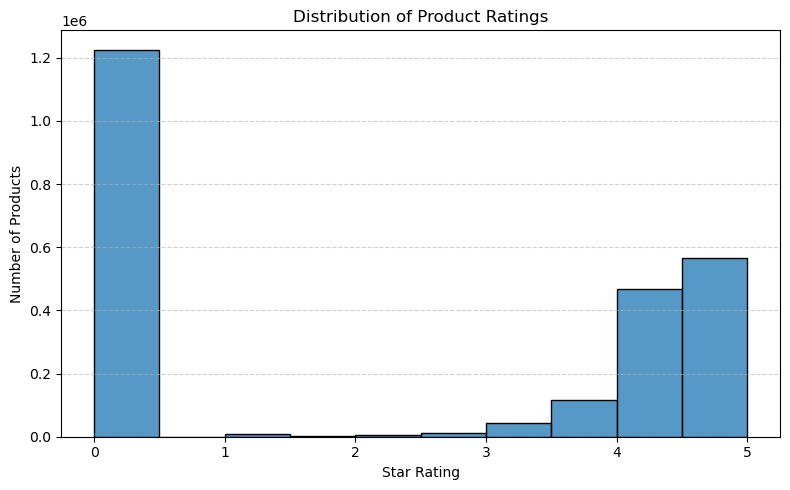

In [27]:

plt.figure(figsize=(8, 5))
sns.histplot(df['stars'], bins=10, kde=False)
plt.title("Distribution of Product Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Number of Products")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [28]:
avg_rating_by_category = df.groupby('category')['stars'].mean().sort_values(ascending=False)

#we group here ('category')['stars'] because we are saying here that for every category give me the related stars 
#Am I analyzing how categories are rated? → use groupby('category')['stars']
#Or am I analyzing how ratings are distributed across categories? → use groupby('stars')['category']


print(avg_rating_by_category.head(10))

category
Luxury Food & Drink                    4.547570
Grocery                                4.469061
Laptop Accessories                     4.449600
Health & Personal Care                 4.439649
Arts & Crafts                          4.432663
Office Paper Products                  4.429804
Customers' Most Loved                  4.409956
Water Coolers, Filters & Cartridges    4.363636
USB Hubs                               4.356800
Cables & Accessories                   4.342990
Name: stars, dtype: float64


In [ ]:
df.stars.describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [31]:
variance_rating = df['stars'].var()
std_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print("Variance:", round(variance_rating, 2))
print("Standard Deviation:", round(std_rating, 2))
print("Interquartile Range (IQR):", iqr_rating)

Variance: 4.82
Standard Deviation: 2.19
Interquartile Range (IQR): 4.4


In [32]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]  # mode() returns a Series

print("Mean Rating:", round(mean_rating, 2))
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)

Mean Rating: 2.15
Median Rating: 0.0
Mode Rating: 0.0


In [33]:
from scipy.stats import skew, kurtosis

skewness = skew(df['stars'].dropna())
kurt = kurtosis(df['stars'].dropna())

print("Skewness:", round(skewness, 2))
print("Kurtosis:", round(kurt, 2))

Skewness: 0.08
Kurtosis: -1.93


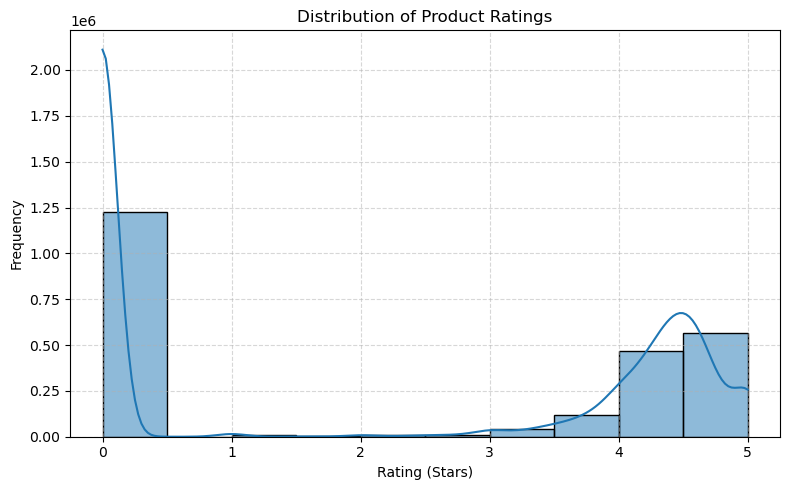

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['stars'].dropna(), bins=10, kde=True)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating (Stars)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()